In [2]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('./deeplearning.mplstyle')

We'll use the same trivial dataset as before:

|Size (1000s sqft) | Price (\\$1000s) |
|---|---|
|1|300|
|2|500|

In [5]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

### The Cost Function
As seen previously:

$$\Large J(w, b) = \frac{1}{2m}\sum^{m - 1}_{i = 0}(f_{w, b}(x^{(i)}) - y^{(i)})^2$$

Where:

$$\large f_{w, b}(x^{(i)}) = wx^{(i)} + b$$


$f$ is the prediction for example $i$ using parameters $w, b$, from which we get the squared error averaged over the dataset, $\large J$

Be careful about the indexing - in lectures, R, and Matlab, for example, indexing range is $[1, m]$, but in Python, it will be $[0, m - 1]$

In [7]:
def compute_cost(x, y, w, b):
    """
    Computes cost function for linear regression.
    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): Target values
      w, b (scalar)   : Model parameters
      
    Returns:
      total_cost (float): The cost of using parameters w, b for 
          linear regression to fit the points in x and y
    """
    m = x.shape[0]
    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum += cost
    
    return cost_sum / (2 * m)

Well, we already know cost is minimized with 
$w = 200 \\ b = 100$

We can check out more generally how different weights affect the cost with that handy module we stole:

In [12]:
plt_intuition(x_train, y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

Now, with a larger dataset:

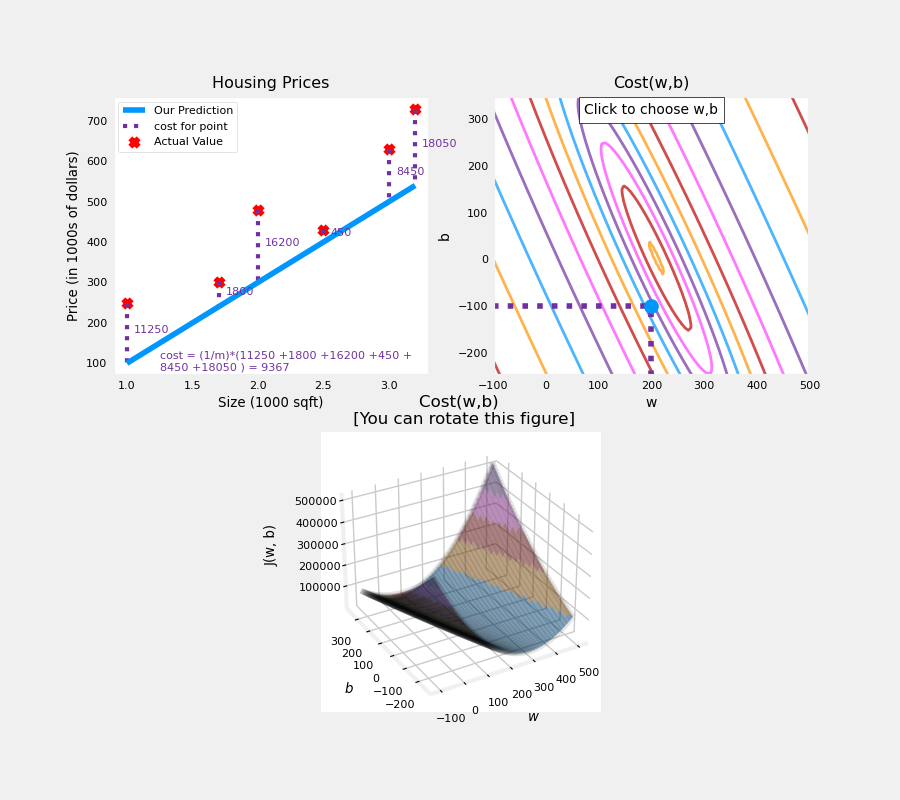

In [16]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480, 430, 630, 730])

plt.close("all")
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)

Finally, an example case where we can't have perfection!
See the minimal cost at the bottom of the contour?
(Almost) no points sit on that line, but it's still the best estimate we can get in general.

The cost function being squared ensures we have a convex surface, making minimization easier with good ol' mathemagic. This will become more complex later, but for now, the simple bowl shape ensures that there is a minimum, and it's unique.
It's more obvious with the following, simplified model that scales evenly with $w$ and $b$:

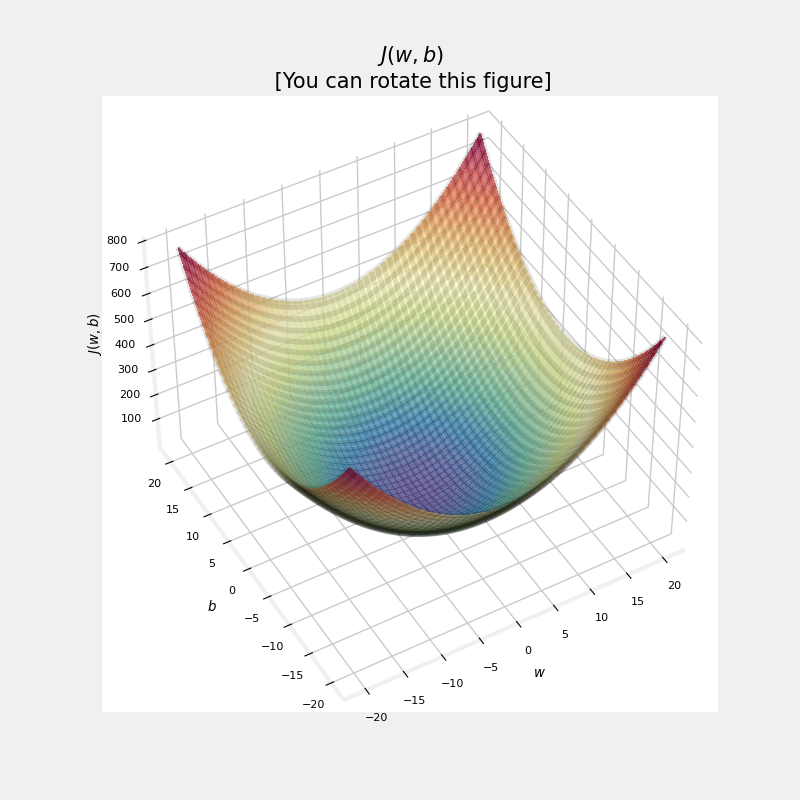

In [17]:
soup_bowl()